In [12]:
#Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) 
                                          if pd.notna(x) else x)


In [13]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


Investigating the trend of skills throughout the year

In [14]:
#.copy() --- creates a copy of the data frame to avoid alteration of the original

df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

df_DS

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"[r, python, sql, pandas, numpy, scikit-learn, ...","{'libraries': ['pandas', 'numpy', 'scikit-lear..."
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785689,Data Scientist,Data Scientist -50065385,Israel,via LinkedIn,Full-time,False,Israel,2023-01-30 06:36:07,False,False,Israel,None,NaN,NaN,Phoenix Holdings קבוצת הפניקס,[sql],{'programming': ['sql']}
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,"[vba, sap, word, powerpoint, excel]","{'analyst_tools': ['sap', 'word', 'powerpoint'..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785697,Data Scientist,Data Science Python modelling,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-01-16 06:12:27,False,False,India,None,NaN,NaN,Live Connections,"[python, sql, r, power bi, tableau, word, exce...","{'analyst_tools': ['power bi', 'tableau', 'wor..."


In [15]:
df_DS['job_posted_year'] = df_DS['job_posted_date'].dt.year

df_DS['job_posted_year'].unique()

array([2023])

In [16]:
df_DS['job_posted_month_num'] = df_DS['job_posted_date'].dt.month
df_DS_explode = df_DS.explode('job_skills')

# df_DS_explode.pivot_table(index = 'job_posted_month_num', columns= 'job_skills', 
# aggfunc = 'size') fill value replaces the NaN values

df_DS_pivot = (df_DS_explode.pivot_table(index = 'job_posted_month_num', 
                                         columns= 'job_skills', 
                                         aggfunc = 'size', fill_value = 0))

df_DS_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


In [17]:
#To sort, we need to add a row that sums up the values 

df_DS_pivot.loc['Total'] = df_DS_pivot.sum()

df_DS_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


In [18]:
# This selects the columns from df_DS_pivot that 
# correspond to the top 5 values in the 'Total' row

df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).head().index]

#  reassign df_DS_pivot to a subset of itself

df_DS_pivot = (df_DS_pivot[df_DS_pivot.loc['Total']
                           .sort_values(ascending=False)
                           .head().index])

# drops the total row.. we needed it just to sort accurately 

df_DS_pivot = df_DS_pivot.drop('Total')

df_DS_pivot

job_skills,python,sql,r,sas,tableau
job_posted_month_num,,,,,
1,13998,9811,7566,3842,3446
2,9551,6600,5064,2644,2566
3,9210,6374,4971,2480,2456
4,9135,6270,4873,2444,2447
5,8029,5583,4228,2244,2271
6,9338,6473,5019,2282,2432
7,9400,6678,5029,2300,2547
8,11193,8026,6089,3100,3013
9,8393,5748,4153,2224,2062


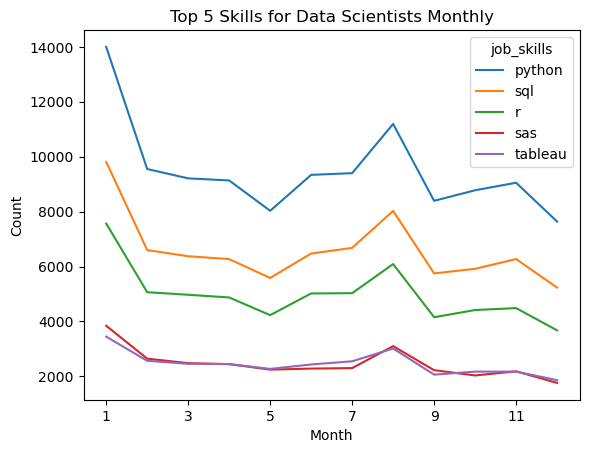

In [19]:
df_DS_pivot.plot(kind = 'line')

plt.title('Top 5 Skills for Data Scientists Monthly')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()



This shows the values of months show in 'mmm' format

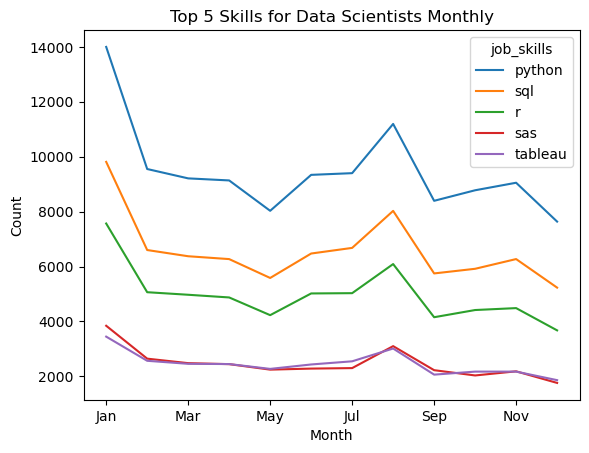

In [20]:
df_DS_pivot = df_DS_pivot.reset_index()

df_DS_pivot['job_posted_month'] = (df_DS_pivot['job_posted_month_num']
                                   .apply(lambda x: 
                                          pd.to_datetime(x, format ='%m')
                                          .strftime('%b')))

df_DS_pivot = df_DS_pivot.set_index('job_posted_month')

df_DS_pivot = df_DS_pivot.drop(columns='job_posted_month_num')

df_DS_pivot.plot(kind='line')

plt.title('Top 5 Skills for Data Scientists Monthly')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()